## Timepos importantes
Aquí vamos a calcular el tiempo de desaceleración que culmina la free expansion junto con las supuestas edades que se estimarían con los resultados de la fase de Sedov (que al parecer no está tan presente en novas como en SN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

#tdec para TCrB
yr_sec= 3.154E7


M_sun=1.989E30  # en kg
Rsun=  6.96E8          # en m


Mo= np.linspace(0.381,2.29,20)*1E-6  *M_sun     
v_wind= 3E4    # en m
v0= 5E6 # en m/s
Mdot= 7E-8 *M_sun/yr_sec

tdec_TCrB= (Mo*v_wind)/(Mdot*v0) /(60*60*24)
print(min(tdec_TCrB),max(tdec_TCrB))

11.921369047619045 71.653373015873


In [3]:
#tdec para RS oph

Mo= np.linspace(0.5 ,2,20)*1E-6  *M_sun 
v_wind= 1E4 #también puede ser 2E4
v0= 3E6     #se mu8eve entre 1000 y 3000 km/s
Mdot= 1E-7 *M_sun/yr_sec

tdec_RS_oph= (Mo*v_wind)/(Mdot*v0) /(60*60*24)
print(min(tdec_RS_oph),max(tdec_RS_oph))

6.084104938271604 24.336419753086417


Rdec promedio para la formula se compone de: 
$$
R_{\mathrm{dec}} \simeq 
\left(\frac{M_0}{10^{-6}M_\odot}\right)
\left(\frac{v_{\infty}}{10\,\mathrm{km\,s^{-1}}}\right)
\left(\frac{\dot M_*}{10^{-7}\,M_\odot\,\mathrm{yr^{-1}}}\right)^{-1}.
$$

In [4]:
AU= 1.496E13     # cm
M_sun=1.989E33   # g
M0=  1E-6*M_sun  # g
vw=  1E6         #cm/s
Mdot=  1E-7 *M_sun/yr_sec
R_dec_avg= ((M0*vw)/Mdot )
R_dec_avg_aU= ((M0*vw)/Mdot )/ AU
print('el radio que se espera con estos valores es de ',R_dec_avg_aU, 'unidades atronómicas')

el radio que se espera con estos valores es de  21.08288770053476 unidades atronómicas


In [5]:
v0= 3E8 #  cm/s
seg_d= 60*60*24           # segundos en un día
tdec= (R_dec_avg/ v0)/seg_d
print('el tiempo para desacelerar que se espera con estos valores es:',tdec, 'días')

el tiempo para desacelerar que se espera con estos valores es: 12.168209876543209 días



The transition time tc averaged for tdec=10 days and v_0= 3000 km//s is:

In [9]:
v0= 3E8 #  cm/s
v_shc= 1.7*1E8 #cm/s
tdec= 10*seg_d
tc= (tdec*(v0/v_shc)**3)/seg_d 
print( tc)

54.95623855078363


Ahora si queremos plotear las dependencias de estos tiempos con sus respectivas variables tenemos:

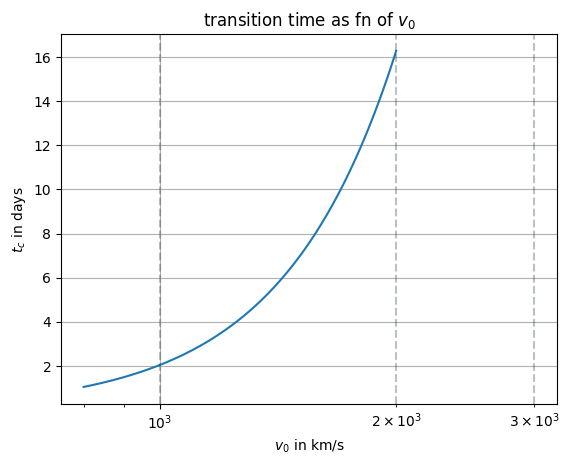

In [43]:
# for tc
v0= np.linspace(8*1E7,2*1E8,100)
tc= (tdec*(v0/v_shc)**3)/seg_d 
v0_kms= v0/1E5

plt.plot(v0_kms,tc)
plt.axvline(1E3,linestyle='dashed',color="#16362f",alpha=0.3)
plt.axvline(2E3,linestyle='dashed',color="#16362f",alpha=0.3)
plt.axvline(3E3,linestyle='dashed',color="#16362f",alpha=0.3)
plt.title(r'transition time as fn of $v_0$')
plt.xlabel(r'$v_0$ in km/s')
plt.ylabel(r'$t_c$ in days ')
plt.xscale('log')
plt.grid('on')
plt.show()

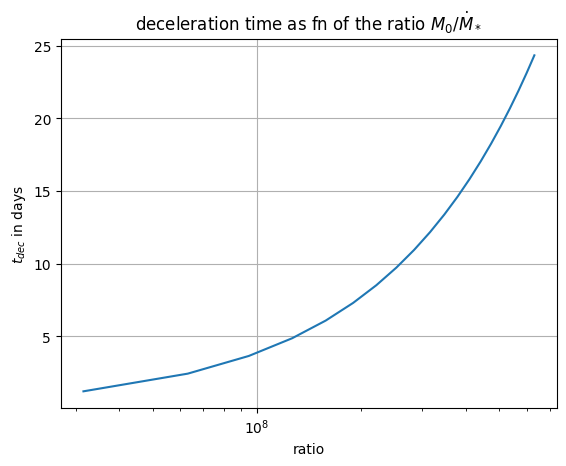

In [16]:
# for tdec
v0= 3E8 #  cm/s
vw=  1E6         #cm/s
Mo= np.linspace(1E-7 ,2*1E-6,20)  *M_sun
Mdot= 1E-7 *M_sun/yr_sec
ratio= Mo/Mdot
tdec= (ratio*vw/v0)/seg_d

plt.plot(ratio,tdec)
plt.title(r'deceleration time as fn of the ratio $M_0/\dot M_*$')
plt.xlabel(r'ratio')
plt.ylabel(r'$t_{dec}$ in days ')
plt.xscale('log')
plt.grid('on')
plt.show()


ahora como fn de v0 con un ratio fijo

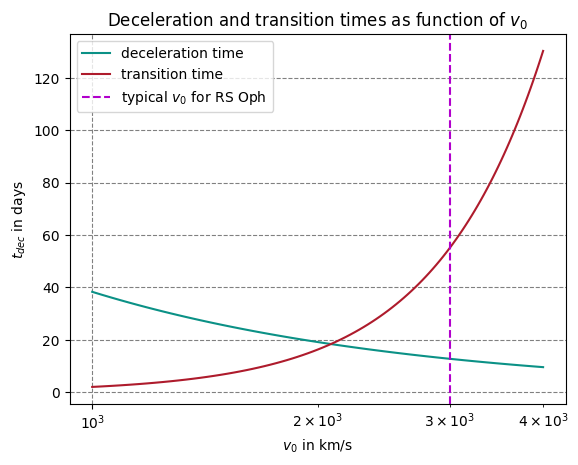

In [17]:
ratio= np.median(ratio)
v0= np.linspace(1E8,4*1E8,100)
tdec= (ratio*vw/v0)/seg_d
tdec_ref= 10*seg_d
tc= (tdec_ref*(v0/v_shc)**3)/seg_d 

v0_kms= v0/ 1E5

plt.plot(v0_kms,tdec,label='deceleration time',color="#0b9186")
plt.plot(v0_kms,tc,label='transition time',color="#AE1B2C")
plt.axvline(3*1E3,linestyle='dashed',color="#b100cc",label=r'typical $v_0$ for RS Oph ')
plt.title(r'Deceleration and transition times as function of $v_0$')
plt.xlabel(r'$v_0$ in km/s')
plt.ylabel(r'$t_{dec}$ in days ')
plt.xscale('log')
plt.legend()
plt.grid('on',ls='--',color='grey')
plt.show()

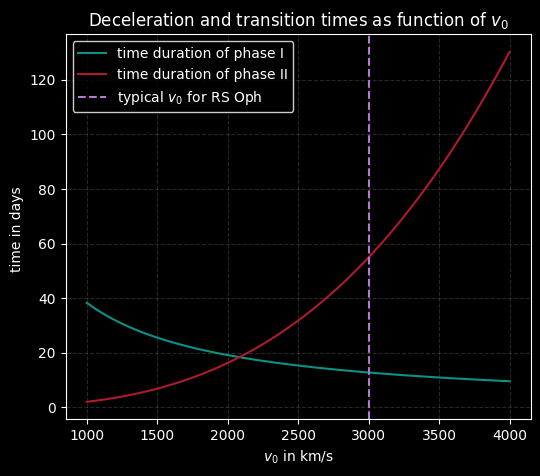

In [18]:
# 1. Configurar la figura y los ejes para fondo negro
plt.figure(figsize=(6, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

# 2. Trazar las curvas (CÓDIGO ORIGINAL SIN MODIFICAR COLORES DE LÍNEAS)
plt.plot(v0_kms, tdec, label='time duration of phase I', color="#0b9186")
plt.plot(v0_kms, tc, label='time duration of phase II', color="#AE1B2C")
plt.axvline(3*1E3, linestyle='dashed', color="#b578d5", label=r'typical $v_0$ for RS Oph ')

# 3. Configuración del gráfico (Texto en Blanco)
plt.title(r'Deceleration and transition times as function of $v_0$', color='white') # Título en blanco
plt.xlabel(r'$v_0$ in km/s', color='white') # Etiqueta X en blanco
plt.ylabel(r'time in days ', color='white') # Etiqueta Y en blanco
#plt.xscale('log')

# Color de los ticks, líneas de ejes y grid
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
for spine in ax.spines.values():
    spine.set_color('white') # Líneas de los ejes en blanco

# Configuración de la Leyenda
legend = plt.legend()
plt.setp(legend.get_texts(), color='white') # Texto de leyenda en blanco
legend.get_frame().set_facecolor('black') # Fondo de leyenda negro
legend.get_frame().set_edgecolor('white') # Borde de leyenda blanco

# Grid (Color gris es visible sobre negro)
plt.grid('on', ls='--', color='grey',alpha=0.3) 


plt.show()

## Temperaturas 
$$T_s= \frac{3}{16} \frac{m}{k_B}v_s^2$$
vamos a tomar como valores típicos: $m=10^{-24}g$, $E_0= 10^{43}erg$, $v_{\infty}=555.56cm/s$ y $\dot M_{*}= 5\times 10^{-8}M_{\odot}/yr$

In [44]:
m= 1E-24                  #g
kb= 1.38*1E-16            # erg/K

#valores par la cte a
v_wind= 227          # cm/s  =10km/h
E0= 1E43                  # ergs   1E42-1E43
M_sun=1.989E33            # en g
Mdot= 5*1E-8 *M_sun/yr_sec


t=np.linspace(1,seg_d*50,(seg_d*50)+1)    #50 días 
a=  ((6*E0*v_wind)/Mdot)**(1/3)
vs= (1/2)*a*t**(-1/3)
Ts= (3/16)*(m/kb)*vs**2


In [46]:
max(v_kms)

np.float64(8142.941986227207)

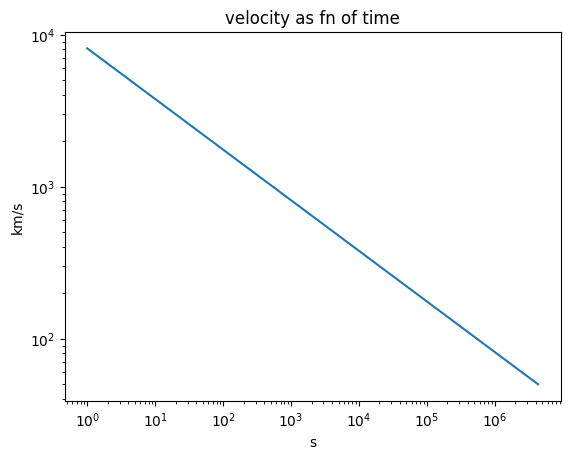

In [45]:
v_kms= vs/1E5
plt.loglog(t,v_kms)
plt.title('velocity as fn of time')
plt.xlabel('s')
plt.ylabel('km/s')
plt.show()

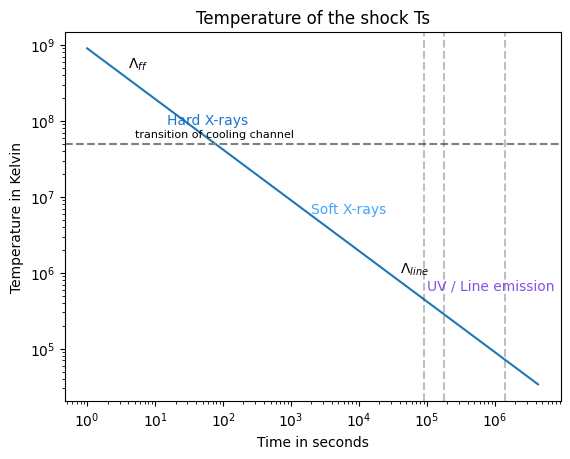

In [47]:
#calculamos algunos tc para plotearlos junto con la temperatura
v0_1= 8*1E7 #  cm/s
v0_2= 1E8
v0_3= 2*1E8
v_shc= 1.7*1E8 #cm/s
tdec= 10*seg_d
tc1= (tdec*(v0_1/v_shc)**3)
tc2= (tdec*(v0_2/v_shc)**3)
tc3= (tdec*(v0_3/v_shc)**3)



plt.loglog(t,Ts)
plt.axhline(5*1E7,color='grey',ls='dashed')
plt.axvline(tc1,linestyle='dashed',color="#16362f",alpha=0.3)
plt.axvline(tc2,linestyle='dashed',color="#16362f",alpha=0.3)
plt.axvline(tc3,linestyle='dashed',color="#16362f",alpha=0.3)


#transicion entre la emisión
plt.text(5,6*1E7,'transition of cooling channel', fontsize='8')
plt.text(4,5*1E8 ,r'$\Lambda_{ff}$')
plt.text(4*1E4,1E6, r'$\Lambda_{line}$')
#bandas de observación

#plt.text(1.5, 3e4, "Optical / IR", fontsize=12, color="#cc6699", alpha=0.8)
plt.text(1E5, 6e5, "UV / Line emission", fontsize=10, color="#763ee7", alpha=0.9)
plt.text(2*1E3, 6e6, "Soft X-rays", fontsize=10, color="#3399ff", alpha=0.9)
plt.text(15, 9e7, "Hard X-rays", fontsize=10, color="#0066cc", alpha=0.9)

plt.title('Temperature of the shock Ts')
plt.xlabel('Time in seconds')
plt.ylabel('Temperature in Kelvin')
plt.show()

discutir posible explicación de este gráfico en cuanto a los tiempos, probablemente el umbral Tc no es muy estricto... Sumar energía en eV y considerar a que energías/temperaturas se dan las líneas de emision de ciertods elementos

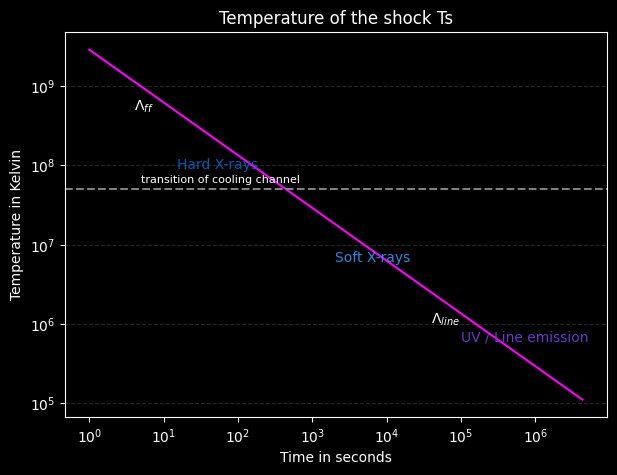

In [53]:

# 1. Configurar la figura y los ejes para fondo negro
plt.figure(figsize=(7, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

# Trazar la curva y la línea horizontal
plt.loglog(t, Ts, color='magenta') # ¡Cambiado a amarillo para visibilidad!
plt.axhline(5*1E7, color='grey', ls='dashed')

# Transición entre la emisión
plt.text(5, 6*1E7, 'transition of cooling channel', fontsize='8', color='white') # ¡Cambiado a blanco!
plt.text(4, 5*1E8, r'$\Lambda_{ff}$', color='white') # ¡Cambiado a blanco!
plt.text(4*1E4, 1E6, r'$\Lambda_{line}$', color='white') # ¡Cambiado a blanco!

# Bandas de observación (los colores originales ya son visibles)
#plt.text(1.5, 3e4, "Optical / IR", fontsize=12, color="#cc6699", alpha=0.8)
plt.text(1E5, 6e5, "UV / Line emission", fontsize=10, color="#763ee7", alpha=0.9)
plt.text(2*1E3, 6e6, "Soft X-rays", fontsize=10, color="#3399ff", alpha=0.9)
plt.text(15, 9e7, "Hard X-rays", fontsize=10, color="#0066cc", alpha=0.9)

# Configuración del gráfico (cambiar color de texto, ticks y spines)
plt.title('Temperature of the shock Ts', color='white') # ¡Cambiado a blanco!
plt.xlabel('Time in seconds', color='white') # ¡Cambiado a blanco!
plt.ylabel('Temperature in Kelvin', color='white') # ¡Cambiado a blanco!

# Color de los ticks y las líneas de los ejes (spines)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
for spine in ax.spines.values():
    spine.set_color('white')

plt.grid('on',axis='y',alpha=0.3,color='grey',ls='dashed')
plt.show()

Mass loss rates from $\dot M= \frac{L_*}{cv_{\infty}}$